In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('Automobile_data.csv')

# Check the first few rows of the data
print(data.head())

# Check for any '?' or invalid values in the 'horsepower' and 'price' columns
print(data[['horsepower', 'price']].isnull().sum())  # Check for missing values
print(data[['horsepower', 'price']].head())  # Preview the first few rows of these columns


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [ ]:
# Replace '?' with NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Drop rows with NaN values in 'horsepower' or 'price' columns
data = data.dropna(subset=['horsepower', 'price'])

# Check the cleaned data
print(data[['horsepower', 'price']].head())


   horsepower    price
0       111.0  13495.0
1       111.0  16500.0
2       154.0  16500.0
3       102.0  13950.0
4       115.0  17450.0


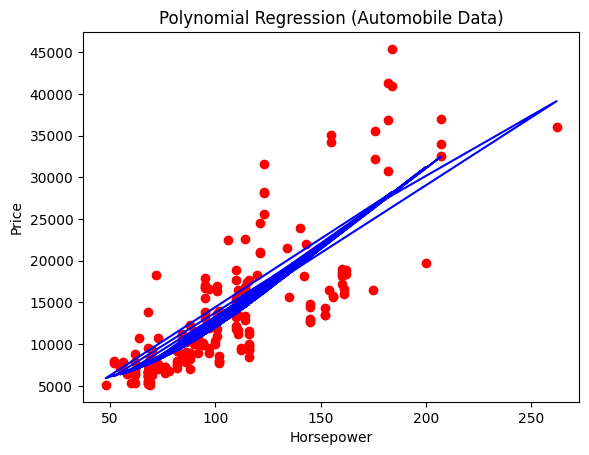

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extract independent and dependent variables
X = data[['horsepower']].values  # Independent variable: horsepower
y = data['price'].values  # Dependent variable: price

# Step 5: Fit Polynomial Regression Model
poly_reg = PolynomialFeatures(degree=3)  # You can change the degree based on your requirements
X_poly = poly_reg.fit_transform(X)
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly, y)

# Step 6: Visualize Results
plt.scatter(X, y, color='red')
plt.plot(X, polynomial_regressor.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression (Automobile Data)')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()
